In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
import os
folders = os.listdir('/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Train/')
labels = []
for folder in folders:
  label = folder.split('_')[-1]
  labels.append(label)

labels

['gha', 'ka', 'cha', 'ga', 'kna', 'ja', 'yna', 'chha', 'kha', 'jha']

In [ ]:
IMAGE_SIZE=[32,32]
train_path='/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Train'
test_path='/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Test'

In [ ]:
import os
import cv2
import numpy as np

x_train = []
y_train = []
x_test = []
y_test = []

for folder in os.listdir(train_path):
  
  label = folder.split('_')[-1]

 
  for filename in os.listdir(os.path.join(train_path, folder)):
    img = cv2.imread(os.path.join(train_path, folder, filename))
    img = cv2.resize(img, IMAGE_SIZE)

    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

for folder in os.listdir(test_path):
 
  label = folder.split('_')[-1]

  for filename in os.listdir(os.path.join(test_path, folder)):
   
    img = cv2.imread(os.path.join(test_path, folder, filename))
    img = cv2.resize(img, IMAGE_SIZE)

    x_test.append(img)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
np.unique(y_test)

array(['cha', 'chha', 'ga', 'gha', 'ja', 'jha', 'ka', 'kha', 'kna', 'yna'],
      dtype='<U4')

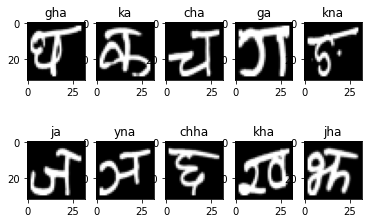

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5)

for i, folder in enumerate(os.listdir(train_path)):

  label = folder.split('_')[-1]

  filename = os.listdir(os.path.join(train_path, folder))[0]

  img = cv2.imread(os.path.join(train_path, folder, filename))
  img = cv2.resize(img, IMAGE_SIZE)

  row = i // 5
  col = i % 5
  ax[row, col].imshow(img)
  ax[row, col].set_title(label)

plt.show()

In [ ]:
import tensorflow as tf
unique_labels = set(y_train)

label_map = {old_label: i for i, old_label in enumerate(sorted(unique_labels))}
print(label_map)

y_train = [label_map[label] for label in y_train]
y_test = [label_map[label] for label in y_test]

y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(unique_labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(unique_labels))

{'cha': 0, 'chha': 1, 'ga': 2, 'gha': 3, 'ja': 4, 'jha': 5, 'ka': 6, 'kha': 7, 'kna': 8, 'yna': 9}


In [ ]:
import tensorflow as tf
num_classes = len(labels)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_SIZE + [3]))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20)


scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

predictions = model.predict(x_test)

Epoch 1/20
532/532 [==============================] - 20s 36ms/step - loss: 3.8183 - accuracy: 0.1756
Epoch 2/20
532/532 [==============================] - 19s 35ms/step - loss: 2.0842 - accuracy: 0.2100
Epoch 3/20
532/532 [==============================] - 17s 33ms/step - loss: 1.9575 - accuracy: 0.2494
Epoch 4/20
532/532 [==============================] - 19s 35ms/step - loss: 1.8038 - accuracy: 0.3258
Epoch 5/20
532/532 [==============================] - 21s 39ms/step - loss: 1.5032 - accuracy: 0.4440
Epoch 6/20
532/532 [==============================] - 18s 34ms/step - loss: 1.2279 - accuracy: 0.5627
Epoch 7/20
532/532 [==============================] - 19s 35ms/step - loss: 0.9875 - accuracy: 0.6402
Epoch 8/20
532/532 [==============================] - 17s 32ms/step - loss: 0.8000 - accuracy: 0.7064
Epoch 9/20
532/532 [==============================] - 17s 32ms/step - loss: 0.6914 - accuracy: 0.7551
Epoch 10/20
532/532 [==============================] - 17s 32ms/step - loss: 0.579

In [ ]:
predictions = model.predict(x_test)

predicted_labels = [np.argmax(prediction) for prediction in predictions]

print(predicted_labels)

94/94 [==============================] - 1s 10ms/step
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [ ]:
label_map = { 0:'cha', 1:'chha',2:'ga', 3:'gha', 4:'ja', 5:'jha', 6:'ka', 7:'kha', 8:'kna', 9:'yna'}

predicted_labels = [label_map[label] for label in predicted_labels]

print(predicted_labels)

['jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'kha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha', 'jha'

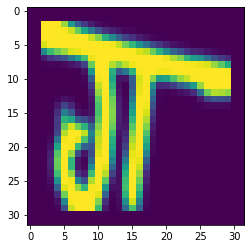

In [ ]:
imagepath='/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Test/character_3_ga/11892.png'
image = plt.imread(imagepath)
plt.imshow(image)
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(imagepath, target_size=(32, 32))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)
print(predicted_label)

1/1 [==============================] - 0s 19ms/step
2


In [ ]:
predicted_character = label_map[predicted_label]
print(predicted_character)

ga
